In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [225]:
df_1 = pd.read_csv(r'G:\data2\ab40c054-5031-4376-b52e-9813e776f65e.csv')
print(df_1.shape)


(11, 36)


In [236]:
# Removing the rows from data of 2016-17
df_2 = df_1.drop(df_1[(df_1.Duration == '2016-17')].index)

# Dropping West Bengal from dataframe as it contains nan
df_2 = df_2.dropna(axis = 1, how = 'all')

# slicing and taking average of rows from 2014-15 to 2015-16 
df_2 = df_2.iloc[6:10, 2:-1].mean(axis = 0)

# resetting the index 
df_2 = df_2.reset_index().set_axis(['States', 'Average'], axis = 1, inplace = False)

# set states as index of dataframe
df_2 = df_2.set_index('States')

#average growth rates of states
df_2.sort_values('Average', ascending = True)



,Average
States,
Goa,6.033333
Meghalaya,6.953333
Odisha,9.836667
Sikkim,10.486667
Jammu & Kashmir,10.900000
Gujarat,11.126667
Punjab,11.185000
Maharashtra,11.260000
Rajasthan,11.320000


<function matplotlib.pyplot.show(*args, **kw)>

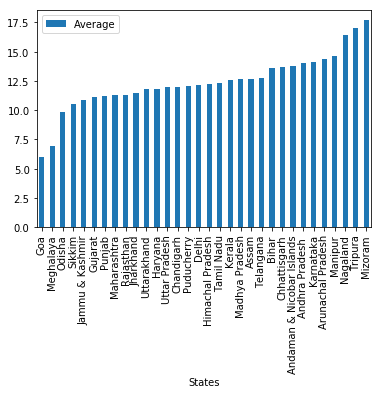

In [237]:
df_2 = df_2.sort_values('Average', ascending = True)[['Average']].plot.bar(stacked = True)

plt.show

# Growth of the states

1. Andhra pradesh and Meghalaya are some states growing constantly as compare to others.
2. Meghalaya grows from 4.87% to 9.58% over the period of three yrs. 
3. Andhra Pradesh grows from 12.85 to 15.85%. 

1. Goa , Karnataka, Chattisgarh etc are some states struggling constantly.
2. Karnataka falls from 18.42% to 11.42%.
3. Chattisgarh falls from 16.44tp 10.98%

 #          Total GDP of the states for the year 2015-16

In [240]:
# extracting 2015-16 row from dataframe
df_3 = df_1.iloc[4:5]

# Transposing the dataframe 
df_3 = df_3.T

# Resetting the index 
df_3 = df_3.reset_index()

# dropping the first two row Duration and items description
df_3 = df_3.drop(df_3.index[0:2])

# renaming the columns to States and GSDP(2015-16)
df_3 = df_3.rename(columns = {'index':'States', 4:'GSDP(2015-16)'})

# setting the states as index of dataframe 
df_3 = df_3.set_index('States')



In [241]:
df_3

,GSDP(2015-16)
States,
Andhra Pradesh,609934
Arunachal Pradesh,18784
Assam,224234
Bihar,413503
Chhattisgarh,260776
Goa,45002
Gujarat,994316
Haryana,485184
Himachal Pradesh,NaN


<function matplotlib.pyplot.show(*args, **kw)>

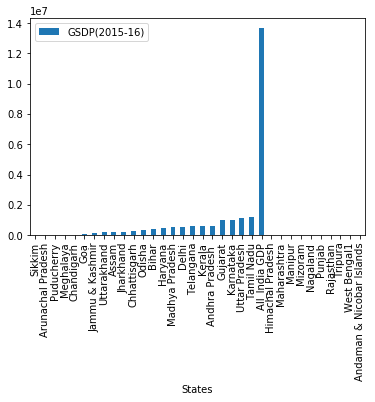

In [242]:
# Ploting the graph between states and GSDP(2015-16) by sorting it
df_3.sort_values('GSDP(2015-16)', ascending = True)[['GSDP(2015-16)']].plot.bar()
plt.show

Top 5 States 
1. Tamil Nadu
2. Uttar Pradesh
3. Karnataka
4. Gujarat
5. Andhra Pradesh

Bottom 5 States
1. Sikkim
2. Arunachal Pradesh
3. Meghalaya
4. Chandigarh
5. Goa
 

#                                # PART 1B

In [72]:
# path of the file
path = r'G:\States'

In [73]:
# all files
all_files = glob.glob(path+'\\*csv')

In [75]:
# importing all the files to python
# creating an empty list
list1 = []

# iterating over all files
for filename in all_files:
    # reading the file into dataframe
    df = pd.read_csv(filename,  encoding = 'cp1252')
    # extracting the 2 columns from dataframe
    df = df[['Item', '2014-15']]
    # Transposing the reuired dataframe
    df = df.T
    # Creating the new header
    new_header = df.iloc[0]
    # setting the new header as the names of column name of dataframe  
    df.columns = new_header
    df = df[1:]
    # Creating new column with name States
    df.loc[:, 'States'] = filename.split('\\')[-1].split('-')[1]
    
    # appending all the files into empty list
    list1.append(df)
    
# concatenating all the files into one dataframe
frame = pd.concat(list1, axis = 0, ignore_index = True, sort = False)

In [76]:
frame

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,5512100,1690800,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN
1,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,70099,30272,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN
2,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
3,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
4,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,52622,23309,2784426,11120,250398,Chandigarh,NaN,NaN,NaN,NaN
5,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,2601791,1332092,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN
6,250568,64959,183770,861,978,963777,1214345,2749307,971255,2048788,...,6611719,392546,49242422,179690,274041,Delhi,NaN,NaN,NaN,NaN
7,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,527279,61854,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN
8,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN
9,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana,NaN,NaN,NaN,NaN


In [77]:
# now removing all the Union Territorries
frame = frame.drop([4])

In [78]:
frame = frame.drop([6])

In [79]:
frame = frame.drop([21])

In [80]:
# dataframe after removing all Union Territories
frame

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,5512100,1690800,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN
1,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,70099,30272,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN
2,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
3,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
5,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,2601791,1332092,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN
7,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,527279,61854,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN
8,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN
9,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana,NaN,NaN,NaN,NaN
10,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,895317,259291,10436879,70840,147330,Himachal_Pradesh,NaN,NaN,NaN,NaN
11,3211065,2094466,562503,445149,108947,2037289,5248354,4114148,337489,1789834,...,2499171,411619,21710718,349660,62091,Jharkhand,NaN,NaN,NaN,NaN


In [81]:
# setting States as the index of the dataframe
frame = frame.set_index('States')

In [82]:
# extracting only Per Capita GsDP column  for all the states
Frame2 = frame[['Per Capita GSDP (Rs.)']]
# sorting the dataframe 
Frame2 = Frame2.sort_values('Per Capita GSDP (Rs.)')

In [83]:
Frame2

,Per Capita GSDP (Rs.)
States,
Bihar,33954
Uttar_Pradesh,49450
Manipur,58442
Assam,60621
Jharkhand,62091
Madhya_Pradesh,62989
Odisha,73979
Meghalaya,76228
Tripura,77358


<function matplotlib.pyplot.show(*args, **kw)>

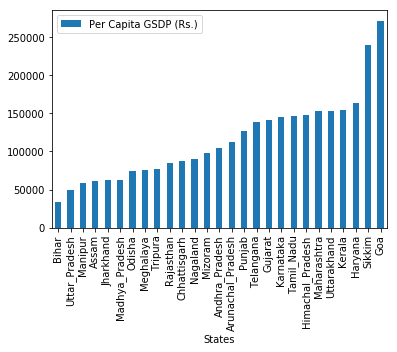

In [84]:
# now plotting the graph between per capita gsdp vs states
Frame2.plot.bar(y = 'Per Capita GSDP (Rs.)')
plt.show

Top & Bottom 5 states  as per Per Capita GSDP

Top 5 States
1. Goa
2. Sikkim
3. Haryana
4. Kerala
5. Uttarakhand

Bottom 5 states
1. Bihar
2. Uttar Pradesh
3. Manipur
4. Assam 
5. Jharkhand


The ratio of Highest Per capita GSDP i.e. of Goa to that of lowest Per Capita GSDP i.e. of Bihar is 8.0


Plot of percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [85]:
# Extracting required columns from dataframe
frame1 = frame.loc[:, lambda frame: ['Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product']]

In [86]:
# adding new columns to the new dataframe 
frame1['Primary Contribution'] =  frame1['Primary'] / frame1['Gross State Domestic Product']
frame1['Secondary Contribution'] = frame1['Secondary'] / frame1['Gross State Domestic Product']
frame1['Tertiary Contribution'] = frame1['Tertiary'] / frame1['Gross State Domestic Product']

In [87]:
# new dataframe with added columns
frame1

,Primary,Secondary,Tertiary,Gross State Domestic Product,Primary Contribution,Secondary Contribution,Tertiary Contribution
States,,,,,,,
Andhra_Pradesh,16303716,10488884,22032942,52646842,0.309681,0.199231,0.418505
Arunachal_Pradesh,716959,287489,631844,1676119,0.427749,0.171521,0.376968
Assam,5326697,4033091,9307109,19809800,0.268892,0.203591,0.469823
Bihar,8019997,5984896,22179969,37391988,0.214484,0.160058,0.593174
Chhattisgarh,6400817,8238886,7588778,23498180,0.272396,0.350618,0.322952
Goa,312129,1547536,1738217,4063307,0.0768165,0.380856,0.427784
Gujarat,1.58872e+07,3.30235e+07,3.02204e+07,8.95027e+07,0.177505,0.368967,0.337648
Haryana,8.04042e+06,1.25614e+07,1.92266e+07,4.37462e+07,0.183797,0.287143,0.439503
Himachal_Pradesh,1548366,4119162,4133326,10436879,0.148355,0.394674,0.396031


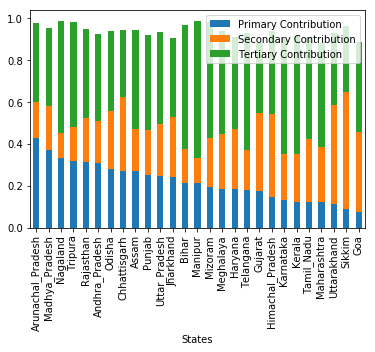

In [219]:
frame1.sort_values('Primary Contribution', ascending = False)[['Primary Contribution', 'Secondary Contribution', 'Tertiary Contribution']].plot.bar(stacked = True)

North Eastern States - Tertiary Sector contributes more than 50% of the Total GDP. There primary sector contribution is very less, leaving Arunachal Pradesh, where Primary Sector contributes 42.77%. 
These States attaracts tourists, as many of these states are tourism places,  generates a revenue from these states.

Primary Sector Contribution in North States is the most as compare to other states.  

Categorization of Dataframe

In [88]:
# subsetting the original dataframe
frame3 = frame.loc[:, ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services','TOTAL GSVA at basic prices', 'Taxes on Products', 'Subsidies on products', 'Gross State Domestic Product', 'Per Capita GSDP (Rs.)']]

In [93]:
# Categorization the dataframe into four categories C1, C2, C3, C4
frame3['Categorization'] = pd.qcut(frame3['Per Capita GSDP (Rs.)'], q = [0, 0.20, 0.50, 0.85, 1], labels = ['C4', 'C3', 'C2', 'C1'])

# sorting the dataframe according to Per Capita GSDP
frame3 = frame3.sort_values('Per Capita GSDP (Rs.)')

In [94]:
frame3

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Per Capita GSDP (Rs.),Categorization
States,,,,,,,,,,,,,,,,,
Bihar,7951890,68107,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,36184863,3213546,2006421,37391988,33954,C4
Uttar_Pradesh,25097754,901501,12261649,2030625,11256450,9437243,7404509,3392275,14548185,6152124,5034623,97516938,10107396,3287219,104337115,49450,C4
Manipur,383140,NaN,49501,27490,143182,262950,109726,30315,159335,297078,317930,1.78065e+06,92766,69137,1.80428e+06,58442,C4
Assam,3855548,1471149,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,18666897,1725309,582406,19809800,60621,C4
Jharkhand,3211065,2037289,4114148,337489,1789834,1991359,1470022,551441,1656784,1088325,1375410,19623166,2499171,411619,21710718,62091,C4
Madhya_Pradesh,16235647,1618373,4368833,1272905,4403151,5357515,2865802,1988794,2660123,2497321,2747805,46016269,4284700,2102800,48198169,62989,C4
Odisha,6422978,2586328,5754229,833067,2402396,3149555,2034016,1065147,2348714,1318221,2340603,30255256,3151184,1209349,32197092,73979,C3
Meghalaya,366521,84529,433213,54473,150256,383974,148189,64091,150409,239782,214211,2.28965e+06,213272,62112,2.44081e+06,76228,C3
Tripura,799825,142391,228625,77870,177899,390423,155956,86094,190704,338244,323287,2.91132e+06,149345,94002,2.96666e+06,77358,C3


In [96]:
# groupby the dataframe by the category column 
dataframe1 = frame3.groupby('Categorization').sum()

In [97]:
# dataframe according to categories
dataframe1

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Per Capita GSDP (Rs.)
Categorization,,,,,,,,,,,,,,,,
C4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,219788780.0,21922888.00,8459602.0,233252066.0,327547.0
C3,42226888.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,12231484.0,5766226.0,16224118.0,7927173.0,12815417.0,167623415.0,17122953.00,6779982.0,177966387.0,691533.0
C2,75209022.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,33749808.0,36296642.0,92121446.0,18567815.0,36253657.0,527484069.0,71902042.04,13005659.0,586380452.0,1264525.0
C1,14391809.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,6818560.0,3936489.0,14740245.0,3571292.0,8059922.0,93126678.0,10774501.00,1970502.0,101930677.0,830922.0


In [98]:
# Finding the percentage of all subsectors 
dataframe1['Agriculture, forestry and fishing'] = dataframe1['Agriculture, forestry and fishing'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Mining and quarrying'] = dataframe1['Mining and quarrying'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Manufacturing'] = dataframe1['Manufacturing'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Electricity, gas, water supply & other utility services'] = dataframe1['Electricity, gas, water supply & other utility services'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Construction'] = dataframe1['Construction'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Trade, repair, hotels and restaurants'] = dataframe1['Trade, repair, hotels and restaurants'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Transport, storage, communication & services related to broadcasting'] = dataframe1['Transport, storage, communication & services related to broadcasting'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Financial services'] = dataframe1['Financial services'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Real estate, ownership of dwelling & professional services'] = dataframe1['Real estate, ownership of dwelling & professional services'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Public administration'] = dataframe1['Public administration'] / dataframe1['Gross State Domestic Product'] * 100
dataframe1['Other services'] = dataframe1['Other services'] /  dataframe1['Gross State Domestic Product'] * 100

In [99]:
dataframe1

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Per Capita GSDP (Rs.)
Categorization,,,,,,,,,,,,,,,,
C4,24.323490,2.613661,10.712459,1.847900,9.764521,11.783216,6.941761,3.294504,10.365410,5.781998,6.799089,219788780.0,21922888.00,8459602.0,233252066.0,327547.0
C3,23.727451,6.088662,12.383423,2.587440,8.826341,9.690206,6.872918,3.240065,9.116395,4.454309,7.201032,167623415.0,17122953.00,6779982.0,177966387.0,691533.0
C2,12.825977,1.769047,18.622130,2.357408,6.932967,10.443537,5.755616,6.189947,15.710184,3.166513,6.182617,527484069.0,71902042.04,13005659.0,586380452.0,1264525.0
C1,14.119213,0.577805,13.498187,1.963097,11.051090,13.730076,6.689409,3.861928,14.461049,3.503648,7.907258,93126678.0,10774501.00,1970502.0,101930677.0,830922.0


In [152]:
data1 = dataframe1.loc[:, ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services']]

In [154]:
data1

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services
Categorization,,,,,,,,,,,
C4,24.323490,2.613661,10.712459,1.847900,9.764521,11.783216,6.941761,3.294504,10.365410,5.781998,6.799089
C3,23.727451,6.088662,12.383423,2.587440,8.826341,9.690206,6.872918,3.240065,9.116395,4.454309,7.201032
C2,12.825977,1.769047,18.622130,2.357408,6.932967,10.443537,5.755616,6.189947,15.710184,3.166513,6.182617
C1,14.119213,0.577805,13.498187,1.963097,11.051090,13.730076,6.689409,3.861928,14.461049,3.503648,7.907258


In [176]:
data2 = data1.iloc[3:]
data_2 = data2.T

In [177]:
data_2

Categorization,C1
"Agriculture, forestry and fishing",14.119213
Mining and quarrying,0.577805
Manufacturing,13.498187
"Electricity, gas, water supply & other utility services",1.963097
Construction,11.051090
"Trade, repair, hotels and restaurants",13.730076
"Transport, storage, communication & services related to broadcasting",6.689409
Financial services,3.861928
"Real estate, ownership of dwelling & professional services",14.461049
Public administration,3.503648


In [184]:
data_2 = data_2.sort_values('C1', ascending = False)
data_2

Categorization,C1
"Real estate, ownership of dwelling & professional services",14.461049
"Agriculture, forestry and fishing",14.119213
"Trade, repair, hotels and restaurants",13.730076
Manufacturing,13.498187
Construction,11.051090
Other services,7.907258
"Transport, storage, communication & services related to broadcasting",6.689409
Financial services,3.861928
Public administration,3.503648
"Electricity, gas, water supply & other utility services",1.963097


In [185]:
data_2_cumsum = data_2.cumsum()

In [186]:
data_2_cumsum

Categorization,C1
"Real estate, ownership of dwelling & professional services",14.461049
"Agriculture, forestry and fishing",28.580261
"Trade, repair, hotels and restaurants",42.310337
Manufacturing,55.808524
Construction,66.859614
Other services,74.766872
"Transport, storage, communication & services related to broadcasting",81.456281
Financial services,85.318209
Public administration,88.821857
"Electricity, gas, water supply & other utility services",90.784954


In [187]:
data_3_cumsum = data_2_cumsum.iloc[0:7]

In [188]:
data_3_cumsum

Categorization,C1
"Real estate, ownership of dwelling & professional services",14.461049
"Agriculture, forestry and fishing",28.580261
"Trade, repair, hotels and restaurants",42.310337
Manufacturing,55.808524
Construction,66.859614
Other services,74.766872
"Transport, storage, communication & services related to broadcasting",81.456281


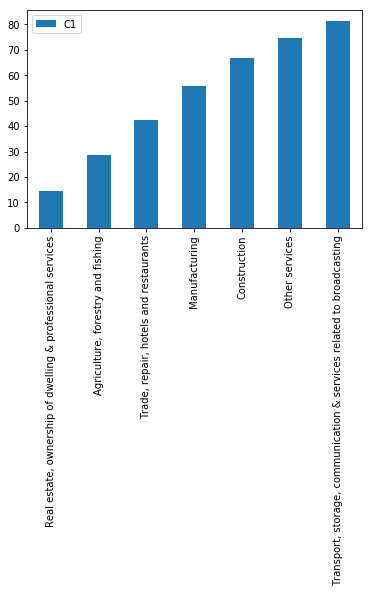

In [189]:
data_3_cumsum.plot.bar(y = 'C1')

# category 1

1.	The plot above shows these subsectors contribute 80% to GDP of category 1. 



In [191]:
# slicing the row 3 of C2 
data3 = data1.iloc[2:3]

# Transposing the dataframe
data_3 = data3.T

#sorting the values
data_sort = data_3.sort_values('C2', ascending = False)
data_sort
# finding the cumulative sum 
data_sort_cumsum = data_sort.cumsum()
data_sort_cumsum

Categorization,C2
Manufacturing,18.622130
"Real estate, ownership of dwelling & professional services",34.332314
"Agriculture, forestry and fishing",47.158291
"Trade, repair, hotels and restaurants",57.601828
Construction,64.534795
Financial services,70.724742
Other services,76.907359
"Transport, storage, communication & services related to broadcasting",82.662975
Public administration,85.829489
"Electricity, gas, water supply & other utility services",88.186896


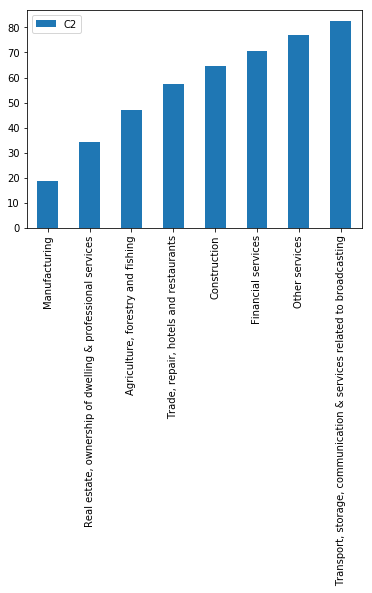

In [192]:
# slicing top subsectors contributing upto 80% 
data_sort_cumsum1 = data_sort_cumsum.iloc[0:8]

#plotting the graph
data_sort_cumsum1.plot.bar(y = 'C2')


In [194]:
# Slicing the C3 row from data1 
data4 = data1.iloc[1:2]

# transposing the data4
data_4 = data4.T

# sorting the dataframe in descending order
data_4_sort = data_4.sort_values('C3', ascending = False)
data_4_sort

# finding the cumulative sum
data_4_cumsum = data_4_sort.cumsum()
data_4_cumsum




Categorization,C3
"Agriculture, forestry and fishing",23.727451
Manufacturing,36.110875
"Trade, repair, hotels and restaurants",45.801080
"Real estate, ownership of dwelling & professional services",54.917475
Construction,63.743816
Other services,70.944849
"Transport, storage, communication & services related to broadcasting",77.817767
Mining and quarrying,83.906428
Public administration,88.360737
Financial services,91.600802


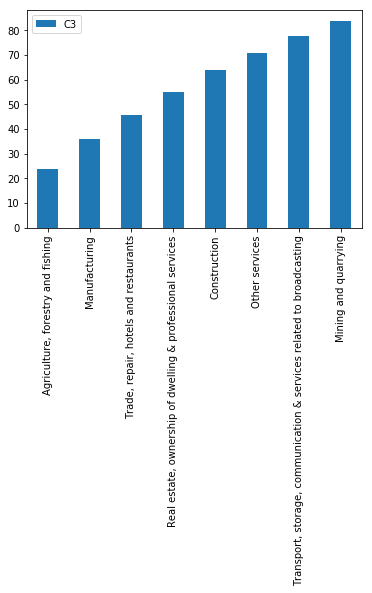

In [195]:
# slicing the top subsectors contributing upto 80%
bar3 = data_4_cumsum.iloc[0:8]

# plotting the graph 
bar3.plot.bar(y = 'C3')

In [196]:
# for category 4
# slicing the top row
data5 = data1.iloc[0:1]

# transposing the dataframe
data_5 = data5.T

# sorting in descending order
data_5_sort = data_5.sort_values('C4', ascending = False)
data_5_sort

# Cumulative sum 
data_5_cumsum = data_5_sort.cumsum()
data_5_cumsum

Categorization,C4
"Agriculture, forestry and fishing",24.323490
"Trade, repair, hotels and restaurants",36.106707
Manufacturing,46.819166
"Real estate, ownership of dwelling & professional services",57.184576
Construction,66.949097
"Transport, storage, communication & services related to broadcasting",73.890858
Other services,80.689947
Public administration,86.471945
Financial services,89.766449
Mining and quarrying,92.380110


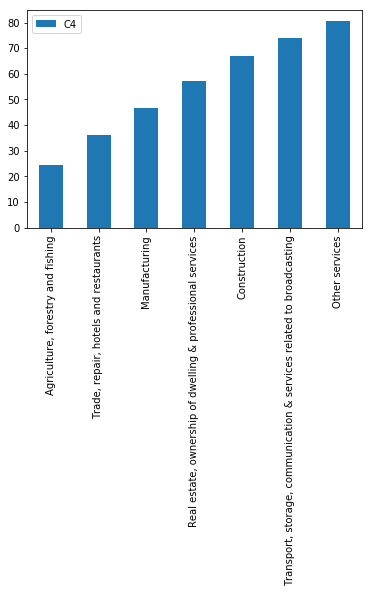

In [197]:
# finding the top sub sectors contributing 80 % 
bar4 = data_5_cumsum.iloc[0:7]

# plotting the graph
bar4.plot.bar(y = 'C4')

1. The GSDP of Top category states like Sikkim Haryana Goa & Kerala, there major GSDP contribution comes from Secondary &     Tertiary sectors. Kerala contributes 56.41% contribution to GSDP from Tertiary Sectors. Similarly Sikkim contributes 55% from Secondary sectors. Secondary Sectors includes Manufacturing sectors, Real estate, ownership sectors.
2. C1 categories states major contributon comes from Manufaturing , Trade, repair hotels, and restaurants, Real estate, ownership of dwelling and professional services. Now these 3 sub sectors comes from Secondary Sub Sectors or tertiary sectors. 
3. These 3, if combine, contributes to the total of 41.68% of GSDP of C1 categories near to the half.

4. While looking at other categories there major contributon comes from Agriculture and the rest strugles to contribute. 

The subsectors correlated with high GDP are 
1. Agriculture, forestry and fishing
2. Manufacturing
3. Real estate, ownership of dwelling & professional services
4. Construction

Sub sectors on which we have to focus are as follows
1. Mining and quarrying
2. Electricity, gas, water supply & other utility services
3. Financial Services

# 1. Category 1

1. The sectors upon which there should be emphasis should be 
1a. Electricity, gas, water supply & other utility services - This sub-sector only contributes only 1.96% to the GDP
    This should improve as compare to other sectors.
1b. Financial Services - This sub sector contributes 3.86% to the total GSDP. 
    Goa and Sikkim contributes less to the GSDP, especially Sikkim. There should be more businesses setup in Sikkim and Goa so     that more banks and investmenst banks or credit card companies. this will improve GDP.
    


# 2. Category 2

1. Construction is the subsector where the emphasis can be put on. 
2. Mining and quarrying sub-sector can be improved. As one of this category states is Arunachal Praesh and its climate and        topography supports Mining. and can be invested in that subsector.


# Category 3
states - Andhra Pradesh, Mizoram, Nagaland, Chattisgarh, rajasthan, Tripura, Meghalaya

1. Public Administration subsector could be improved. Implementation of rules and regulations and implementation of government    policies. control, Regulation, planning of govt policies should be encouraged to improve the contribution of this sector to    the GDP.
2. Finnancial Services in this category also very low. New Businesses can be introduced to bring investment banks to such          states to improve GDP of states. 
3. Transportation is not so good as many are north eastern states. these states attaract tourists to these states and transportion can help to tourists to reach their conviniently.

# Category 4
States = Bihar, Manipur, Assam, Jharkhand, Madhya Pradesh, Meghalaya

1. In this category we can put emphasis on secondary and tertiary sectors to increase the GDP of states. Agriculture alreadxy contributes 23% of this category. 
2. Electricity, gas, water supply & other utility services sector should be improved to attaract the industries to come to these states to invest. 
 


#                  PART 2


In [205]:
 # importing the csv file 
df = pd.read_csv(r'C:\Users\tabish\Downloads\rs_session243_au570_1.1.csv')    

In [206]:
df2 = df.rename(columns = {'Level of Education - State':'States'})

In [207]:
df2

,Sl. No.,States,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [208]:
path = r'G:\States'
all_files = glob.glob(path+'\\*csv')


li = []

for filename in all_files:
    df = pd.read_csv(filename,  encoding = 'cp1252')
    df = df[['Item', '2014-15']]
    df = df.T
    new_header = df.iloc[0]
    df.columns = new_header
    df = df[1:]
    df.loc[:, 'States'] = filename.split('\\')[-1].split('-')[1]
    
    li.append(df)
    
frame = pd.concat(li, axis = 0, ignore_index = True, sort = False)

In [209]:
frame['States'] = frame['States'].replace({'Uttar_Pradesh':'Uttar Pradesh', 'Tamil_Nadu':'Tamil Nadu', 'Madhya_Pradesh':'Madhya Pradesh', 'Himachal_Pradesh':'Himachal Pradesh', 'Arunachal_Pradesh':'Arunachal Pradesh', 'Andhra_Pradesh':'Andhra Pradesh'})

In [210]:
frame

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,5512100,1690800,52646842,501510,104977,Andhra Pradesh,NaN,NaN,NaN,NaN
1,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,70099,30272,1676119,14870,112718,Arunachal Pradesh,NaN,NaN,NaN,NaN
2,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
3,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
4,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,52622,23309,2784426,11120,250398,Chandigarh,NaN,NaN,NaN,NaN
5,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,2601791,1332092,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN
6,250568,64959,183770,861,978,963777,1214345,2749307,971255,2048788,...,6611719,392546,49242422,179690,274041,Delhi,NaN,NaN,NaN,NaN
7,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,527279,61854,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN
8,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN
9,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana,NaN,NaN,NaN,NaN


In [211]:
# now merging the two dataframes df2 and frame
result = pd.merge(df2, frame, on = ['States'], how = 'inner')

In [212]:
# slicing the data from original dataframe result corresponding Primary Upper primary and secondary
result1 = result.loc[:, ['States', 'Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015', 'Per Capita GSDP (Rs.)']]

In [213]:
result1

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
0,Andhra Pradesh,4.35,5.20,15.71,104977
1,Arunachal Pradesh,10.89,6.71,17.11,112718
2,Assam,7.44,10.51,27.06,60621
3,Bihar,2.09,4.08,25.90,33954
4,Chandigarh,NaN,0.44,NaN,250398
5,Delhi,NaN,0.76,11.81,274041
6,Goa,0.20,0.07,11.15,271793
7,Gujarat,0.76,6.41,25.04,141263
8,Haryana,0.41,5.81,15.89,164077
9,Himachal Pradesh,0.46,0.87,6.07,147330


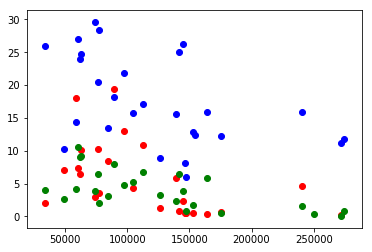

In [214]:
ax1 = plt.scatter(result1['Per Capita GSDP (Rs.)'], result1['Primary - 2014-2015'], color = 'r', label = 'Primary')
plt.scatter(result1['Per Capita GSDP (Rs.)'], result1['Upper Primary - 2014-2015'], color = 'g', label = 'Upper Primary')
plt.scatter(result1['Per Capita GSDP (Rs.)'], result1['Secondary - 2014-2015'], color = 'b', label = 'Secondary')


plt.show()


# Primary education

1. Maximum number of dropouts for primary education is occuring in states having Per Capita GDP between 50k to 150k. As the Per Capita GDP increases the dropout in Primary education decreases. 
2. Sikkim is the only state having Per Capita GDP around 25k and drop out is around 5%.

# Upper Primary Education

1. The Pattern is same as of Primary education. 
2. There is a cluster of  drops out in states having per capita gdp between 80k and 150k. 

# Secondary Education

1. A large percentage, around 20%-25% of dropout is occuring in low GDP states.
2. Bihar = 24.67%, Assam = 27%, Odisha = 29.56% etc. These are the states having low GDP.
3. As compare to Primary and Upper Primary, a large percentage of dropouts occuring in Secondary Education.
4. Some states are as high as 25% - 27%.